# Klustering

Lakukan klustering dataset Pokemon seperti demo, [download di sini](https://blog.sanbercode.com/wp-content/uploads/2021/03/pokemon.csv), kemudian lakukan klustering dengan menggunakan kolom Attack dan Defense yang biasa (bukan yang hasil logaritmik seperti contoh). Lalu jelaskan kira-kira mengapa digunakan transformasi logaritmik pada contoh.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("pokemon.csv)
# Preview the first 5 lines of the loaded data
data.head()

,Unnamed: 0,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,4,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,5,4,Charmander,Fire,309,39,52,43,60,50,65


In [ ]:
 data["Attack"] = pd.to_numeric(data["Attack"])
 data["Defense"] = pd.to_numeric(data["Defense"])

 #menambahkan dua kolom tranformasi
 data["Alog"] = np.log(data["Attack"])
 data["Dlog"] = np.log(data["Defense"])

 data.head()

,Unnamed: 0,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Alog,Dlog
0,1,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,3.891820,3.891820
1,2,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,4.127134,4.143135
2,3,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,4.406719,4.418841
3,4,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,4.605170,4.812184
4,5,4,Charmander,Fire,309,39,52,43,60,50,65,3.951244,3.761200


In [ ]:
log_data = data.iloc[:, 11:13]
log_data.head()

,Alog,Dlog
0,3.891820,3.891820
1,4.127134,4.143135
2,4.406719,4.418841
3,4.605170,4.812184
4,3.951244,3.761200


## Distribusi Kolom Logaritmik

(array([[  2.,   0.,   3.,   0.,   1.,   9.,   8.,  29.,  55.,  94., 149.,
         146.,  68.,  25.,   5.],
        [  2.,   0.,   1.,   0.,   4.,   5.,   3.,  43.,  73., 117., 147.,
         115.,  62.,  14.,   8.]]),
 array([1.60943791, 1.86468067, 2.11992343, 2.37516619, 2.63040895,
        2.88565171, 3.14089447, 3.39613723, 3.65137999, 3.90662275,
        4.16186551, 4.41710827, 4.67235103, 4.92759379, 5.18283655,
        5.43807931]),
 <a list of 2 BarContainer objects>)

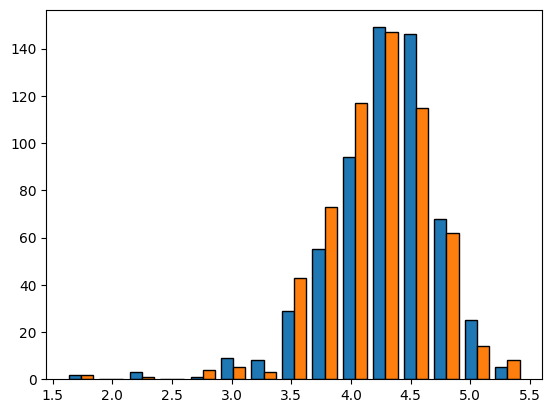

In [ ]:
plt.hist(log_data, ec='black', bins=15)

In [ ]:
log_array = np.array(log_data)
log_array

array([[3.8918203 , 3.8918203 ],
       [4.12713439, 4.14313473],
       [4.40671925, 4.41884061],
       ...,
       [4.14313473, 3.80666249],
       [4.53259949, 4.00733319],
       [4.81218436, 4.17438727]])

In [ ]:
normal_data = data.iloc[:, 6:8]
normal_data.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


## Distribusi Kolom Normal

(array([[  6.,  33.,  68.,  94., 110., 110.,  76.,  37.,  30.,  15.,   9.,
           4.,   2.,   0.,   0.],
        [  7.,  26.,  98., 117., 117.,  80.,  72.,  38.,  17.,  10.,   4.,
           3.,   0.,   2.,   3.]]),
 array([  5.,  20.,  35.,  50.,  65.,  80.,  95., 110., 125., 140., 155.,
        170., 185., 200., 215., 230.]),
 <a list of 2 BarContainer objects>)

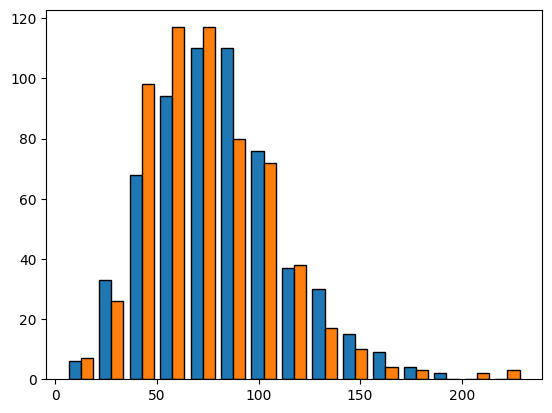

In [ ]:
plt.hist(normal_data, ec='black', bins=15)

In [ ]:
normal_array = np.array(normal_data)
normal_array

array([[ 49,  49],
       [ 62,  63],
       [ 82,  83],
       ...,
       [ 63,  45],
       [ 93,  55],
       [123,  65]])

## K-Means dengan normal_array

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=200)
kmeans.fit(normal_array)
data['kluster'] = kmeans.labels_
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,kluster
0,1,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,0
1,2,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60,0
2,3,3,Venusaur,Grass Poison,525,80,82,83,100,100,80,1
3,4,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,1
4,5,4,Charmander,Fire,309,39,52,43,60,50,65,0


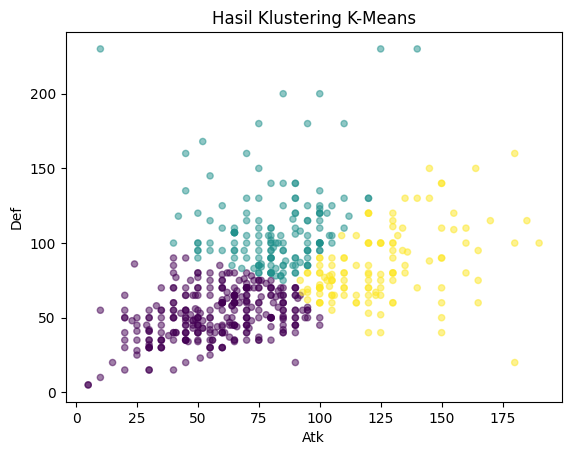

In [ ]:
plt.scatter(data.Attack, data.Defense, s = 20, c = data.kluster, marker = "o", alpha = 0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Atk")
plt.ylabel("Def")
plt.show()

# Menentukan K

Tentukan data yang sesuai untuk dataset Pokemon di atas dengan menggunakan dua metoda yang dijelaskan tadi

## Elbow Method

In [ ]:
sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(log_array)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(log_array)
    nilai_sse = 0

    for i in range(len(log_array)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += (log_array[i, 0] - titik_pusat[0]) ** 2 + (log_array[i, 1] - titik_pusat[1]) ** 2

    sse.append(nilai_sse)
    k_list.append(k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

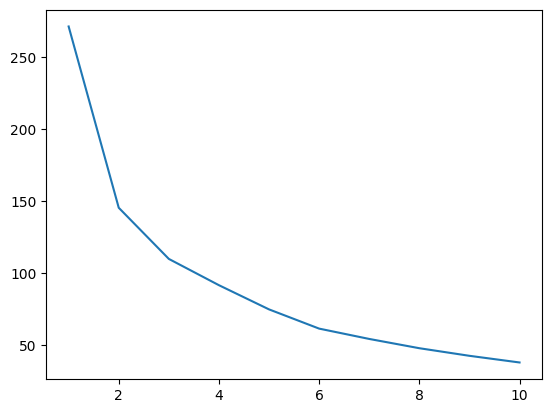

In [ ]:
  plt.plot(k_list,sse)
  plt.show()

## Silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

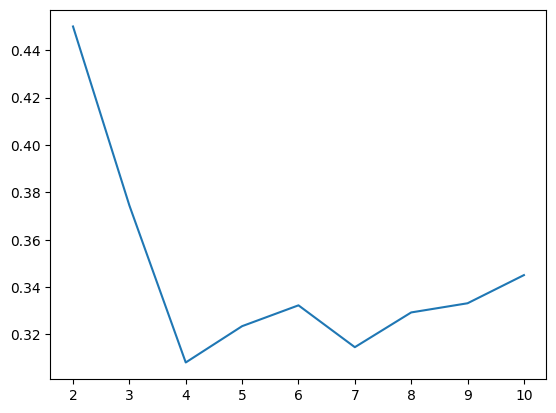

In [ ]:
from sklearn.metrics import silhouette_score

data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(log_array)
    labels = kmeans.labels_
    data.append(silhouette_score(log_array, labels, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list,data)
plt.show()